# Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [0]:
!wget http://iali.in/datasets/mushrooms.csv

--2020-06-04 17:32:18--  http://iali.in/datasets/mushrooms.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv.1’

mushrooms.csv.1     100%[===================>] 365.24K   386KB/s    in 0.9s    

2020-06-04 17:32:19 (386 KB/s) - ‘mushrooms.csv.1’ saved [374003/374003]



In [0]:
dataset = pd.read_csv("http://iali.in/datasets/mushrooms.csv")

# Checking if the data has been imported correctly by using describe

In [0]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
dataset.sample()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2548,e,x,f,e,t,n,f,c,b,p,t,b,s,s,g,p,p,w,o,p,k,v,d


# LABEL ENCODING

In [0]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for colTitle in dataset.columns:
  dataset[colTitle] = labelEncoder.fit_transform(dataset[colTitle])
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [0]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Converting type to text

In [0]:
for colTitle in dataset.columns:
  dataset[colTitle] =dataset[colTitle].astype('category')

In [0]:
dataset.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,0,5,3,4,0,5,1,0,0,0,1,1,2,2,7,7,0,2,1,4,7,4,0
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


In [0]:
x = dataset.iloc[:,1:23].values
y = dataset.iloc[:,0].values

In [0]:
x

array([[6, 1, 0, ..., 4, 2, 3],
       [0, 1, 0, ..., 4, 3, 2],
       [3, 1, 0, ..., 4, 3, 2],
       ...,
       [5, 0, 0, ..., 4, 0, 1],
       [8, 1, 0, ..., 0, 7, 4],
       [5, 0, 0, ..., 4, 4, 1]], dtype=object)

In [0]:
y

[1, 0, 0, 1, 0, ..., 0, 0, 0, 1, 0]
Length: 8124
Categories (2, int64): [0, 1]

# SPLITTING TEST AND TRAIN DATA

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

[Text(133.59807692307692, 205.35999999999999, 'X[4] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2939, 2747]'),
 Text(64.38461538461539, 181.2, 'X[16] <= 3.5\ngini = 0.278\nsamples = 2324\nvalue = [387, 1937]'),
 Text(25.753846153846155, 157.04, 'X[15] <= 1.5\ngini = 0.211\nsamples = 417\nvalue = [367, 50]'),
 Text(12.876923076923077, 132.88, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(38.63076923076923, 132.88, 'X[3] <= 0.5\ngini = 0.085\nsamples = 384\nvalue = [367, 17]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 367\nvalue = [367, 0]'),
 Text(51.50769230769231, 108.72, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(103.01538461538462, 157.04, 'X[6] <= 2.0\ngini = 0.021\nsamples = 1907\nvalue = [20, 1887]'),
 Text(90.13846153846154, 132.88, 'X[8] <= 0.5\ngini = 0.005\nsamples = 1892\nvalue = [5, 1887]'),
 Text(77.26153846153846, 108.72, 'X[3] <= 0.5\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(64.38461538461539, 84.56, 'gini = 0.0\nsamples = 16

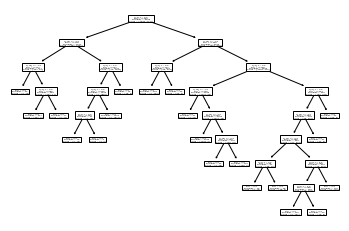

In [0]:
tree.plot_tree(clf)

In [0]:
y_pred =clf.predict(x_test)

In [0]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

1.0

# One-Hot Encoding

In [0]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer 
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough') 
  
#dataset = np.array(columnTransformer.fit_transform(dataset), dtype = np.str) 

# Data Visualization

In [0]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [0]:
df

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2433,0,0
2434,0,0
2435,1,1
2436,1,1


# Bar graph

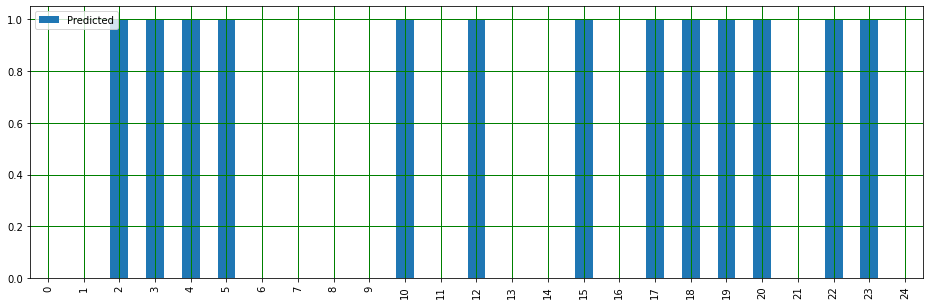

In [0]:
import matplotlib.pyplot as plt
df1 = df.head(25)  # graph with top 25 rows of original data frame
df1.plot(kind='bar', figsize=(16,5))   #bargraph any values to make its size.
plt.grid(which='major', linestyle='-',linewidth='1', color='green')
plt.grid(which='minor', linestyle=':',linewidth='1', color='black')
plt.show()